## Maximizing mutual benefit by long-term implementation of Nash Equilibrium strategy in Non-Zero-Sum Competitive Games

In [6]:
# my imports
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd



### Abstract:
The aim of this project is to explore the applicability and effectiveness of the Nash Equilibrium concept in a finite non-zero-sum competitive games such as Prisoner's dilemma, Battle of the Sexes, Deadlock, etc. By analyzing various game scenarios and implementing Nash equilibrium strategies, the project seeks to prove that the mutual benefits (combined payoff) of equilibrium outcomes are superior compared to purely competitive strategies or best outcome actions in long-term finite competitive interactions. Outside of the project's scope are the cooperative scenarios and multi-level stochastic (Markov) games as these scenarios have been extensively examined in previous works.

### 1. Introduction to Game Theory:
#### What is Game Theory?
Game theory is a branch of applied mathematics that analyzes situations where players make interdependent decisions. Each player considers the possible strategies of others when forming their own strategy. A game solution outlines the optimal decisions for players with similar, opposed, or mixed interests and the resulting outcomes (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory).
Game theory was developed by mathematician John von Neumann and economist Oskar Morgenstern to address economic problems. In their 1944 book, "The Theory of Games and Economic Behavior" they argued that mathematics used in physical sciences, which describes an unbiased nature, was not suitable for modeling economics (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory).
In the 1950s, American mathematician John Nash further developed game theory. He established its mathematical principles, focusing on the rivalries between competitors with mixed interests (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory).

#### Significance and practical applications of Game Theory.
Game theory studies mathematical models of strategic interactions among rational agents. It is widely used in economics, social sciences, logic, systems science, and computer science. Initially focused on two-person zero-sum games, where one participant's gain is another's loss, it expanded in the 1950s to include non zero-sum games. Today, it covers rational decision-making in humans, animals, and computers (Wikipedia, the free encyclopædia, 2024; Game theory).
Game theory has been used to predict the formation of political coalitions and business conglomerates, determine optimal pricing in competitive markets, assess voter or voting bloc power, select jury members, choose manufacturing plant locations, and understand the behavior of animals and plants in survival scenarios (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory).

### 2. Introduction to Nash Equilibrium:
Overview of Nash equilibrium as a solution concept in game theory and previous research.
Explanation of Nash Equilibrium's relevance in competitive environments and its implications in the process of strategic decision-making.

### 3. Characteristics of Non-Zero-Sum Games:
Definition and characteristics of non-zero sum games.
Distinction from zero-sum games and implications for strategic interactions.

### 4. Mutual Benefits in Non-Zero-Sum Games:
How Nash equilibrium strategies can lead to mutually beneficial outcomes in non-zero sum games.
Scenarios where cooperation among rational agents yields superior outcomes compared to purely competitive strategies.

### 5. Examples of Non-Zero-Sum Competitive Games:
Identification of specific game scenarios of non-zero-sum competitive interactions.
Description of each game scenario and its strategic dynamics.

#### Prisoner's dilemma 
|               | B confess | B stay silent |
|---------------|-----------|---------------|
| A confess     | 5, 5      | 0, 20         |
| A stay silent | 20, 0     | 1, 1          |


#### Battle of the sexes

|                |H Boxing Match  | H Ballet|
|----------------|----------------|---------|
|W Boxing Match  | 2, 3           | 1, 1    |
|W Ballet        | 1, 1           | 3, 2    |

#### Deadlock 
|            |B Cooperate |B Defect |
|------------|------------|---------|
|A Cooperate | 1, 1       | 0, 3    |
|A Defect    | 3, 0       | 2, 2    |

### 6. Implementation of Nash Equilibrium Strategies:
Methodology for implementing Nash equilibrium strategies in non-zero-sum games.
Computational techniques and software tools for analyzing equilibrium outcomes.

### 7. Simulation Results:
Presentation of simulation results for the selected game scenarios.
Analysis of equilibrium strategies and outcomes.

In [10]:
# Function used to randomize the numbers for the game matrix
def randomize():
    numbers = list(range(1, 9))
    shuffle(numbers)
    numbers_for_matrix = numbers[0:4]
    return numbers_for_matrix

In [11]:
# Positive payoff Nash equilibrium solver (the more the better) 

def find_positive_payoff_nash_equilibrium(numbers_for_a, numbers_for_b):
    
    #build the game matrix:
    matrix = (numbers_for_a, numbers_for_b)

    # get all possible outcomes as objects {coordinate; value}:
    l_l_a = {'coordinates': (0, 0), 'value': matrix[0][0]} # if b goes left, a goes left value for A
    l_r_a = {'coordinates': (0, 1), 'value': matrix[0][1]} # if b goes left, a goes right value for A
    r_l_a = {'coordinates': (0, 2), 'value': matrix[0][2]} # if b goes right, a goes left value for A
    r_r_a = {'coordinates': (0, 3), 'value': matrix[0][3]} # if b goes right, a goes right value for A
    l_l_b = {'coordinates': (1, 0), 'value': matrix[1][0]} # if a goes left, b goes left value for B
    l_r_b = {'coordinates': (1, 1), 'value': matrix[1][1]} # if a goes left, b goes right value for B
    r_l_b = {'coordinates': (1, 2), 'value': matrix[1][2]} # if a goes right, b goes left value for B
    r_r_b = {'coordinates': (1, 3), 'value': matrix[1][3]} # if a goes right, b goes right value for B

    # find best outcomes for each oposing player decision from type "A goes left - B best outcome":
    find_max_and_index = lambda x, y: (x['value'], x['coordinates'][1]) if x['value'] > y['value'] else (y['value'], y['coordinates'][1])

    b_goes_left_a_best_outcome, b_goes_left_a_best_outcome_index = find_max_and_index(l_l_a, l_r_a)
    b_goes_right_a_best_outcome, b_goes_right_a_best_outcome_index = find_max_and_index(r_l_a, r_r_a)
    a_goes_left_b_best_outcome, a_goes_left_b_best_outcome_index = find_max_and_index(l_l_b, r_l_b)
    a_goes_right_b_best_outcome, a_goes_right_b_best_outcome_index = find_max_and_index(l_r_b, r_r_b)


    # check if Nash Equilibrium exist for the given matrix:
    if b_goes_left_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_left_a_best_outcome_index == a_goes_right_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_right_b_best_outcome_index:
        set_intersection = set([b_goes_left_a_best_outcome_index, b_goes_right_a_best_outcome_index])\
            .intersection(set([a_goes_left_b_best_outcome_index,a_goes_right_b_best_outcome_index]))
        nash_sums = [numbers_for_a[x] + numbers_for_b[x] for x in list(set_intersection)]
        max_of_nash_sums = max(nash_sums)
    else: 
        return 0, 0, 0



    # find and return best Nash Equilibrium, best outcome for A payoff sum and best outcome for B payoff sum:
    max_a = max(numbers_for_a)
    b_for_max_a = numbers_for_b[numbers_for_a.index(max_a)]
    sum_for_max_a = max_a + b_for_max_a
    max_b = max(numbers_for_b)
    a_for_max_b = numbers_for_a[numbers_for_b.index(max_b)]
    sum_for_max_b = max_b + a_for_max_b

    
    return max_of_nash_sums, sum_for_max_a, sum_for_max_b



In [12]:
# Negative payoff Nash equilibrium solver (the less the better) 

def find_negative_payoff_nash_equilibrium(numbers_for_a, numbers_for_b):
    
    #build the game matrix:
    matrix = (numbers_for_a, numbers_for_b)

    # get all possible outcomes as objects {coordinate; value}:
    l_l_a = {'coordinates': (0, 0), 'value': matrix[0][0]} # if b goes left, a goes left value for A
    l_r_a = {'coordinates': (0, 1), 'value': matrix[0][1]} # if b goes left, a goes right value for A
    r_l_a = {'coordinates': (0, 2), 'value': matrix[0][2]} # if b goes right, a goes left value for A
    r_r_a = {'coordinates': (0, 3), 'value': matrix[0][3]} # if b goes right, a goes right value for A
    l_l_b = {'coordinates': (1, 0), 'value': matrix[1][0]} # if a goes left, b goes left value for B
    l_r_b = {'coordinates': (1, 1), 'value': matrix[1][1]} # if a goes left, b goes right value for B
    r_l_b = {'coordinates': (1, 2), 'value': matrix[1][2]} # if a goes right, b goes left value for B
    r_r_b = {'coordinates': (1, 3), 'value': matrix[1][3]} # if a goes right, b goes right value for B

    # find best outcomes for each oposing player decision from type "A goes left - B best outcome":
    find_min_and_index = lambda x, y: (x['value'], x['coordinates'][1]) if x['value'] < y['value'] else (y['value'], y['coordinates'][1])

    b_goes_left_a_best_outcome, b_goes_left_a_best_outcome_index = find_min_and_index(l_l_a, l_r_a)
    b_goes_right_a_best_outcome, b_goes_right_a_best_outcome_index = find_min_and_index(r_l_a, r_r_a)
    a_goes_left_b_best_outcome, a_goes_left_b_best_outcome_index = find_min_and_index(l_l_b, r_l_b)
    a_goes_right_b_best_outcome, a_goes_right_b_best_outcome_index = find_min_and_index(l_r_b, r_r_b)

    # check if Nash Equilibrium exist for the given matrix:
    if b_goes_left_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_left_a_best_outcome_index == a_goes_right_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_right_b_best_outcome_index:
        set_intersection = set([b_goes_left_a_best_outcome_index, b_goes_right_a_best_outcome_index])\
            .intersection(set([a_goes_left_b_best_outcome_index, a_goes_right_b_best_outcome_index]))
        nash_sums = [numbers_for_a[x] + numbers_for_b[x] for x in list(set_intersection)]
        min_of_nash_sums = min(nash_sums)
    else: 
        return 0, 0, 0



    # find and return best Nash Equilibrium, best outcome for A payoff sum and best outcome for B payoff sum:
    min_a = min(numbers_for_a)
    b_for_min_a = numbers_for_b[numbers_for_a.index(min_a)]
    sum_for_min_a = min_a + b_for_min_a
    min_b = min(numbers_for_b)
    a_for_min_b = numbers_for_a[numbers_for_b.index(min_b)]
    sum_for_min_b = min_b + a_for_min_b

    return min_of_nash_sums, sum_for_min_a, sum_for_min_b


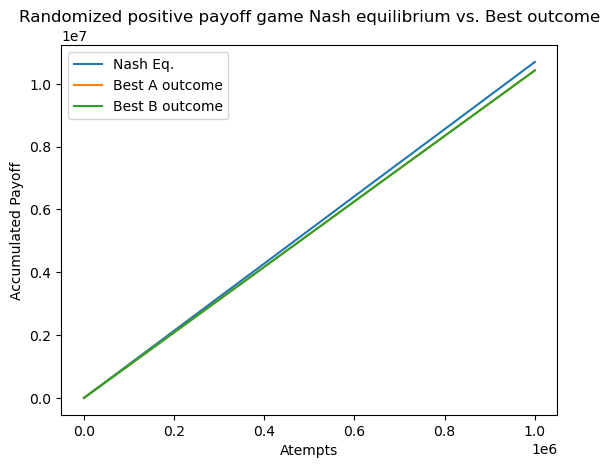

In [13]:
# Randomized positive payoff game Nash Equilibrium

nash_eq = []
a_min = []
b_min = []
n_temp = 0
a_temp = 0
b_temp = 0
for i in range(1_000_000):
    numbers_for_a = randomize()
    numbers_for_b = randomize()
    n, a, b = find_positive_payoff_nash_equilibrium(numbers_for_a, numbers_for_b)
    n_temp += n
    a_temp += a
    b_temp += b
    nash_eq.append(n_temp)
    a_min.append(a_temp)
    b_min.append(b_temp)
x = list(range(1, len(nash_eq) + 1))
plt.title("Randomized positive payoff game Nash equilibrium vs. Best outcome")
plt.plot(x, nash_eq, label = 'Nash Eq.')
plt.plot(x, a_min, label = 'Best A outcome')
plt.plot(x, b_min, label = 'Best B outcome')
plt.legend()
plt.xlabel('Atempts')
plt.ylabel('Accumulated Payoff')
plt.show()

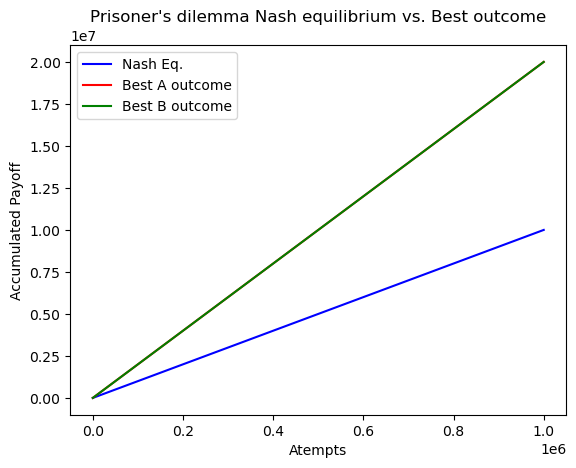

In [14]:
# Negative payoff game Nash Equilibrium Prisoner's dilemma

nash_eq = []
a_min = []
b_min = []
n_temp = 0
a_temp = 0
b_temp = 0
for i in range(1_000_000):
    nums_for_a = [5, 20, 0, 1]
    nums_for_b = [5, 0, 20, 1]
    n, a, b = find_negative_payoff_nash_equilibrium(nums_for_a, nums_for_b)
    n_temp += n
    a_temp += a
    b_temp += b
    nash_eq.append(n_temp)
    a_min.append(a_temp)
    b_min.append(b_temp)
x = list(range(1, len(nash_eq) + 1))
plt.title("Prisoner's dilemma Nash equilibrium vs. Best outcome")
plt.plot(x, nash_eq, label = 'Nash Eq.', color= 'b')
plt.plot(x, a_min, label = 'Best A outcome', color = 'r')
plt.plot(x, b_min, label = 'Best B outcome', color = 'g')
plt.legend()
plt.xlabel('Atempts')
plt.ylabel('Accumulated Payoff')
plt.show()


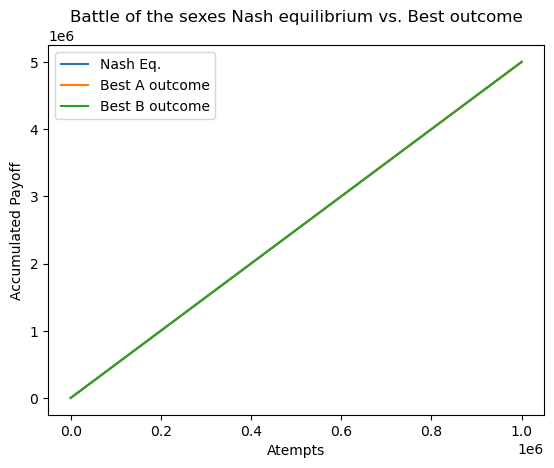

In [15]:
# Positive payoff game Nash Equilibrium Battle of the sexes

nash_eq = []
a_min = []
b_min = []
n_temp = 0
a_temp = 0
b_temp = 0
for i in range(1_000_000):
    numbers_for_a = [2, 1, 1, 3]
    numbers_for_b = [3, 1, 1, 2]
    n, a, b = find_positive_payoff_nash_equilibrium(numbers_for_a, numbers_for_b)
    n_temp += n
    a_temp += a
    b_temp += b
    nash_eq.append(n_temp)
    a_min.append(a_temp)
    b_min.append(b_temp)
x = list(range(1, len(nash_eq) + 1))
plt.title("Battle of the sexes Nash equilibrium vs. Best outcome")
plt.plot(x, nash_eq, label = 'Nash Eq.')
plt.plot(x, a_min, label = 'Best A outcome')
plt.plot(x, b_min, label = 'Best B outcome')
plt.legend()
plt.xlabel('Atempts')
plt.ylabel('Accumulated Payoff')
plt.show()

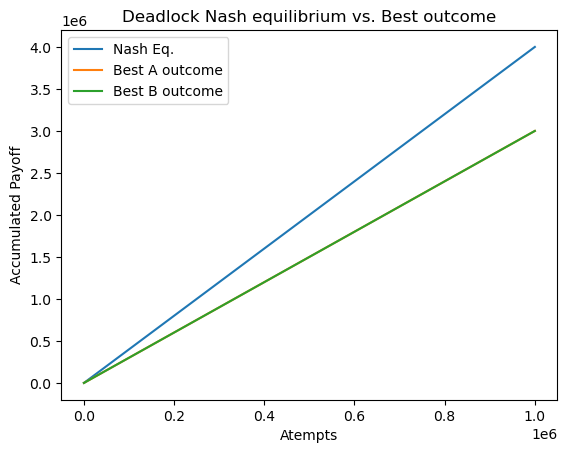

In [17]:
# Positive payoff game Deadlock 

nash_eq = []
a_min = []
b_min = []
n_temp = 0
a_temp = 0
b_temp = 0
for i in range(1_000_000):
    numbers_for_a = [1, 3, 0, 2]
    numbers_for_b = [1, 0, 3, 2]
    n, a, b = find_positive_payoff_nash_equilibrium(numbers_for_a, numbers_for_b)
    n_temp += n
    a_temp += a
    b_temp += b
    nash_eq.append(n_temp)
    a_min.append(a_temp)
    b_min.append(b_temp)
x = list(range(1, len(nash_eq) + 1))
plt.title("Deadlock Nash equilibrium vs. Best outcome")
plt.plot(x, nash_eq, label = 'Nash Eq.')
plt.plot(x, a_min, label = 'Best A outcome')
plt.plot(x, b_min, label = 'Best B outcome')
plt.legend()
plt.xlabel('Atempts')
plt.ylabel('Accumulated Payoff')
plt.show()

### 8. Comparison with Alternative Strategies:
Comparison of Nash equilibrium strategies with alternative approaches in non-zero-sum games.
Evaluation of the effectiveness and robustness of Nash equilibrium solutions.

### 9. Implications for Strategic Decision Making:
Insights into the practical implications of Nash equilibrium in real-world competitive environments.
Recommendations for strategic decision-makers based on the project findings.

### 10. Conclusion and Future Directions:
Summary of key findings and conclusions drawn from the project.
Suggestions for future research directions and potential areas of exploration in non-zero-sum game theory.

### References

Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory. Available at:<br>
https://www.britannica.com/science/game-theory (Accessed: 01 June 2024). <br>
<br>
Encyclopædia Britannica, Inc. Corporate Site.,2024; Nash equilibrium. Available at:<br>
https://www.britannica.com/science/Nash-equilibrium (Accessed: 01 June 2024). <br>
<br>
Wikipedia, the free encyclopædia, 2024; Game theory. Available at:<br>
https://en.wikipedia.org/wiki/Game_theory (Accessed: 01 June 2024).<br>
<br>
Wikipedia, the free encyclopædia, 2024; Nash equilibrium. Available at:<br>
https://en.wikipedia.org/wiki/Nash_equilibrium (Accessed: 01 June 2024).<br>
<br>
Conrad Kosowsky, 2023; Nash Equilibrium Existence without Convexity. Available at:<br>
https://paperswithcode.com/paper/nash-equilibrium-existence-without-convexity (Accessed: 01 June 2024).<br>
<br>
Xinrun Wang, Chang Yang, Shuxin Li, Pengdeng Li, Xiao Huang, Hau Chan, Bo An, 2024; Reinforcement Nash Equilibrium Solver. Available at:<br>
https://arxiv.org/abs/2405.03518 (Accessed: 01 June 2024).<br>
<br>
Tobias Wand, Oliver Kamps, Benjamin Skjold, 2024; Cooperation in a non-Ergodic World on a Network -- Insurance and Beyond. Available at:<br>
https://arxiv.org/abs/2403.12095 (Accessed: 01 June 2024).<br>
<br>
Janet Chen, Su-I Lu, Dan Vekhter, 1999; Game Theory. Available at:<br>
https://cs.stanford.edu/people/eroberts/courses/soco/projects/1998-99/game-theory/index.html (Accessed: 01 June 2024).<br>